In [2]:
import numpy as np

def mobility(T,L,time,kB = 1.38064852e-23,q = 1.60217662e-19):
    D = L**2/time
    mobility = D*q/(kB*T)
    return mobility,D
def mobility_cm2(T,L,time,kB = 1.38064852e-23,q = 1.60217662e-19):
    m,D = mobility(T,L,time,kB = kB,q = q)
    mobility_cm2=m*1e4
    D_cm2 = D*1e4
    return mobility_cm2,D_cm2

In [2]:
L_list = [2.7] # um
time_list = [10] # us
mobility_cm2_list = []
D_list = []
for L in L_list:
    for time in time_list:
        m,D = mobility_cm2(T= 273.15+20,L=L*1e-6,time=time*1e-6)
        mobility_cm2_list.append(m)
        D_list.append(D)
print('mobility_cm2 max: ',np.max(mobility_cm2_list),'D max: ',np.max(D_list))
print('mobility_cm2 min: ',np.min(mobility_cm2_list),'D min: ',np.min(D_list))

mobility_cm2 max:  0.2885791089138064 D max:  0.0072900000000000005
mobility_cm2 min:  0.2885791089138064 D min:  0.0072900000000000005


In [3]:
(0.7/5.2*2+0.2/1)*10.7
# (0.6/2.7*2+1/10)*0.3

5.02076923076923

In [4]:
0.27/0.007
10.7/0.3

35.666666666666664

In [5]:
L = 5.2
time=0.7
mobility_cm2(T= 273.15+20,L=L*1e-6,time=time*1e-6)

(15.29135627087855, 0.3862857142857143)

In [6]:
mobility_cm2_list

[0.2885791089138064]

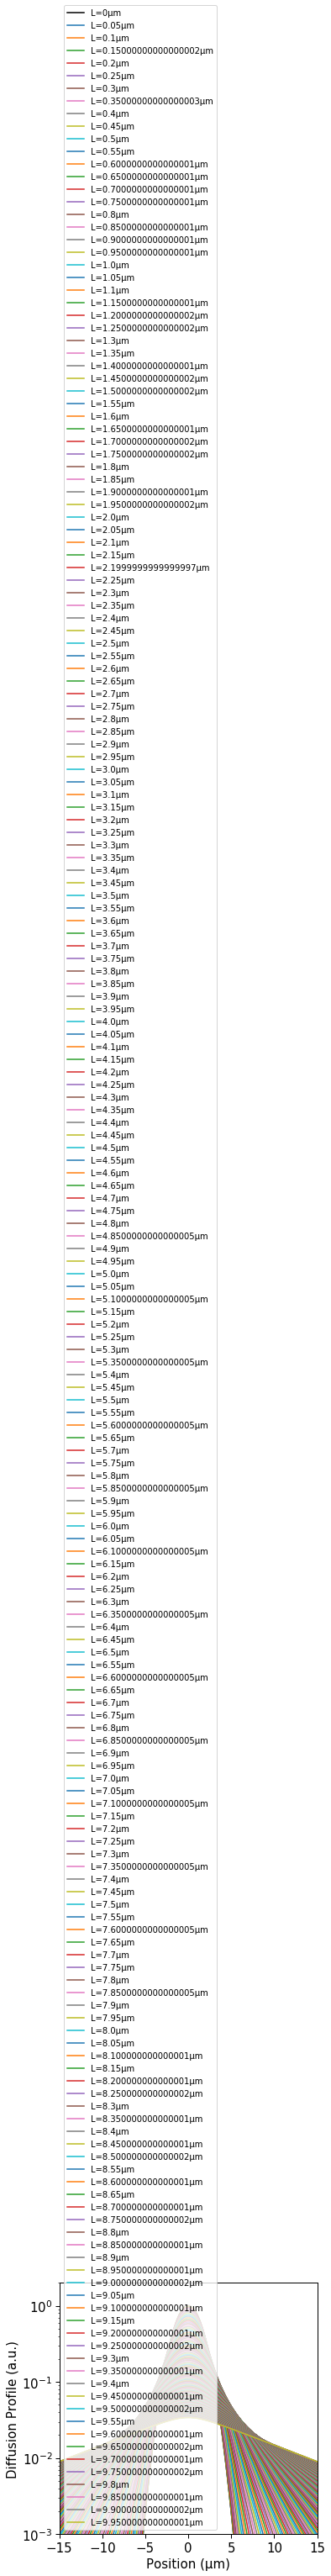

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', linewidth=1)
plt.rc('xtick.major',size=5,width=1)
plt.rc('ytick.major',size=5,width=1)

def diffusion_map(L,w0,pos_max=25,point_num=100,A=1):
    l = np.linspace(-pos_max,pos_max,point_num); 
    unit_length = 2*pos_max/point_num
    num = len(l);  # number of pixels in one dimension
    [xx, yy] = np.meshgrid(l,l);
    R = np.sqrt(xx**2 + yy**2);  # distance matrix
    N = A * np.exp(-2*R**2/w0**2);  # Gaussian beam Nin
    z = np.zeros((num, num));   # initialize sum resuot
    middle = round(num/2);
    for  i in range(middle):
        for j in range(middle):
            x = xx[i,j];
            y = yy[i,j];        
            # Nin = A * np.exp(-2*R(i,j)^2/w0^2);
            Nin = N[i,j];
            r = np.sqrt((xx - x)**2 + (yy - y)**2);
            Nr3 = Nin * unit_length **2 / (2 * np.pi * L**2) * np.exp(-r / L);   # Quadrant III
            Nr1 = Nr3[::-1,::-1];  # Quadrant I
            Nr2 = Nr3[::-1,:];  # Quadrnat III
            Nr4 = Nr3[:,::-1];
            if x == 0 and  y == 0:
                z = z + Nr3;
            elif x == 0:
                z = z + Nr3 + Nr2;
            elif y == 0:
                z = z + Nr3 + Nr4;
            else:
                z = z + Nr1 + Nr2 + Nr3 + Nr4;
    return xx,yy,z

L_list = []
max_list = []
buffer = []

plt.figure(figsize=(5.5,5.5))
L = 1e-100
xx,yy,z = diffusion_map(L,2*np.sqrt(2),point_num=100,pos_max=15)
L_list.append(L)
x_axis_fit = xx[0]
total = np.sum(z)
z/=total
z_axis_fit = z[round(z.shape[0]/2)]
z0 = np.max(z_axis_fit)#or np.max(z). They are the same
max_list.append(np.max(z_axis_fit)/z0)

plt.plot(x_axis_fit,z_axis_fit/z0,label='L={}μm'.format(int(L)),color='black')
buffer.append(z_axis_fit/z0)
step = 0.05
for L in tqdm(np.arange(step,10,step)):
    L_list.append(L)
    xx,yy,z = diffusion_map(L,2*np.sqrt(2),point_num=100,pos_max=15)
    x_axis_fit = xx[0]
    total = np.sum(z)
    z/=total
    z_axis_fit = z[round(z.shape[0]/2)]
    max_list.append(np.max(z_axis_fit)/z0)
    plt.plot(x_axis_fit,z_axis_fit/z0,label='L={}μm'.format(L))
    buffer.append(z_axis_fit/z0)
plt.yscale('log')
plt.xlim(-15,15)
plt.ylim(1e-3,2)
plt.xlabel('Position (μm)')
plt.ylabel('Diffusion Profile (a.u.)')
plt.legend()

In [9]:
print(*(buffer[5]),sep='\n')

0.004824872354897125
0.005125598927457766
0.005445036190136932
0.005784343926071487
0.006144753173980864
0.00652757050367836
0.006934182529562892
0.007366060671501762
0.007824766171944678
0.008311955377224565
0.008829385289708806
0.009378919395639672
0.009962533770985658
0.010582323464201729
0.011240509150186127
0.011939444043546901
0.012681621051051629
0.01346968013214351
0.014306415821737474
0.015194784849880662
0.016137913766487485
0.017139106443742468
0.018201851280343358
0.01932982786541539
0.020526912768199124
0.021797183991445205
0.02314492344519721
0.02457461653779169
0.026090947602476093
0.027698789316850814
0.029403183422205444
0.031209308728747276
0.03312243027564218
0.03514781999664282
0.03729063316343384
0.03955571401968898
0.04194728433475953
0.04446843359114536
0.04712027122835684
0.04990051656811403
0.052801208146230384
0.05580517509552592
0.05888105945761851
0.061977180651441977
0.06501548281357528
0.06788800844135155
0.07045916832762876
0.07257661315154142
0.074091140

# Do not need to run the following cell to save file if not necessary!!!

In [24]:
import pickle
with open('./data/L_max_lists.pickle','wb') as f:
    pickle.dump([L_list,max_list],f)

0.0651333889010721


([<matplotlib.axis.XTick at 0x1b1615b90f0>,
 <a list of 11 Text xticklabel objects>)

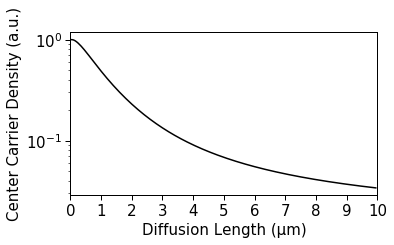

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', linewidth=1)
plt.rc('xtick.major',size=5,width=1)
plt.rc('ytick.major',size=5,width=1)

import pickle
import matplotlib.pyplot as plt
with open('./data/L_max_lists.pickle','rb') as f:
    [L_list,max_list] = pickle.load(f)
plt.figure(figsize=(5.5,3))
plt.plot(L_list,max_list,'black')
L_target = 5.2
coeff = np.interp(L_target,L_list,max_list)
print(coeff)
# plt.plot([0,10],[coeff,coeff],'--')
# plt.plot([L_target,L_target],[0,1e-1],'--')

plt.yscale('log')
plt.xlabel('Diffusion Length (μm)')
plt.ylabel('Center Carrier Density (a.u.)')
plt.xlim(0,10)
plt.xticks(np.arange(0,11,1))

In [27]:
import pandas as pd
df = pd.DataFrame([L_list,max_list]).T
df.to_csv('./n_vs_L.csv')

In [12]:
print(*max_list,sep='\n')

1.0
0.690720914343229
0.2834283483676016
0.15502136380279471
0.10160120166512154
0.07488223143257776
0.05962698230950732
0.0500345989120731
0.04355510598087559
0.03893361630806704


In [13]:
a = 1/(2*1e-6)**2
0.01*1e-6/(np.pi/a)*0.1

79.57747154594767

53.653198923737314
106442503293218.17
53.65319892373731


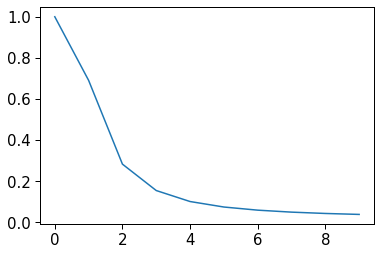

In [18]:
#red k2 unit: (S/m)/(mW/cm^2)=0.1 S*m/W
import pickle
import matplotlib.pyplot as plt

with open('./data/L_max_lists.pickle','rb') as f:
    [L_list,max_list] = pickle.load(f)
power_list=[100,300,800,2000,5000,10000]
HTL_list=[0.366015069,0.742414023,1.340483549,2.395732257,3.958618397,4.706604931]
ETL_list=[0.116024899,0.262404151,0.675649819,1.1532989,2.203120486,5.166716805]
def getSlope(signal_center_list,power_list=power_list):
    power_list = power_list[:len(signal_center_list)]
    m,b = np.polyfit(np.log(power_list), np.log(signal_center_list), 1)
    k = np.exp(b)
    k2 = ((np.exp(m*np.log(power_list[-1])+b))-(np.exp(m*np.log(power_list[0])+b)))/(power_list[-1]-power_list[0])
    return k2
# print(getSlope(HTL_list))

plt.plot(L_list,max_list)
L_target = 5.2
time = 1e-6
ipce=0.66
sigma = 0.366
Pc=100*10
h=6.62607004e-34
c=299792458
q=1.602176634e-19
wavelength=446e-9
thn=250e-9
v=c/wavelength
coeff = np.interp(L_target,L_list,max_list)

HTL_slope_raw = 0.366/100#getSlope(HTL_list)#0.00051077 #0.00072197
ETL_slope_raw = getSlope(ETL_list)#0.00049#0.00055834
pvk_slope_raw = 0.00134138
HTL_slope = HTL_slope_raw*0.1
ETL_slope = ETL_slope_raw*0.1
pvk_slope = pvk_slope_raw*0.1
def mobility1(slope,time,wavelength,coeff,h=h,q=q,c=c,thn=thn,ipce=1):
    v=c/wavelength
    return h*v*slope*thn/(coeff*ipce*time*q)

def mobility1_cm2(slope,time,wavelength,coeff,thn=thn,ipce=ipce):
    return 1e4*mobility1(slope,time,wavelength,coeff,h=h,q=q,c=c,thn=thn,ipce=ipce)

print(mobility1_cm2(HTL_slope,time,wavelength,coeff))

n = coeff*ipce*Pc*time/(h*v)
print(n)
print(sigma*thn/n/q*1e4)

In [66]:
5/0.15

33.333333333333336

In [115]:
print(((np.interp(5.2-0.7,L_list,max_list)-np.interp(5.2+0.7,L_list,max_list))/2/np.interp(5.2,L_list,max_list)+0.2/1+0.04/0.38)*14.9)
print(((np.interp(2.7-0.6,L_list,max_list)-np.interp(2.7+0.6,L_list,max_list))/2/np.interp(2.7,L_list,max_list)+1/10+0.03/0.15)*0.5)

7.203952265092255
0.3283278283720512


14.426687956663846 11.388081669850465
11.130362652873673 8.430340796566227
19.945169091872735 14.69352531065309
21.977207419604376 14.671248612984218
20.58385603377713 12.968983356693673
15.239209364259255 9.742854898361344


(0.0, 22.654550750756282)

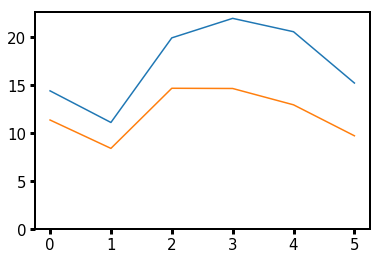

In [41]:
import pickle
with open('./data/L_max_lists.pickle','rb') as f:
    [L_list,max_list] = pickle.load(f)
    
HTL_slope_raw = 0.00072197
ETL_slope_raw = 0.00055834
pvk_slope_raw = 0.00134138
HTL_slope = HTL_slope_raw*0.1
ETL_slope = ETL_slope_raw*0.1
pvk_slope = pvk_slope_raw*0.1

L_target = 5.2
coeff = np.interp(L_target,L_list,max_list)

diffusion_list_fit_list_raw = [5.2, 4.9, 4.3, 3.8, 3.8, 3.7] 
error_list_raw = [[4.5, 6.0], [4.1, 5.6], [3.6, 5.0], [3.2, 4.4], [3.4, 4.3], [3.3, 4.2]]

diffusion_list_fit_list_HTL_raw=[5.4, 5.1, 4.9, 4.2, 3.8, 3.9]
error_list_HTL_raw= [[4.6, 6.2], [4.3, 5.9], [4.1, 5.7], [3.5, 4.9], [3.2, 4.5], [3.3, 4.5]]
HTL_fast_list = [1013.6179816054856, 1221.3287502961339, 646.8498985597492, 475.958255422412, 440.7563927529191, 617.9884227436353]

diffusion_list_fit_list_ETL_raw = [3.2, 2.9, 2.7, 2.7, 2.8, 2.8]
error_list_ETL_raw =  [[2.7, 3.7], [2.6, 3.4], [2.2, 3.2], [2.2, 3.2], [2.3, 3.2], [2.6, 3.1]]
ETL_slow_list = [8682.903903139735, 8281.72717913675, 8425.291193256046, 8031.985535796504, 7942.704202833372, 7222.710921974838]

m1_list = []
m2_list = []
for i in range(len(diffusion_list_fit_list_HTL_raw)):
    time = HTL_fast_list[i]
    length = diffusion_list_fit_list_HTL_raw[i]
    coeff = np.interp(length,L_list,max_list)
    m1 = mobility1_cm2(HTL_slope,time/1000*1e-6,446e-9,coeff,ipce=1,thickness=250e-9)
    m1_list.append(m1)
    m2 = mobility_cm2(T= 273.15+20,L=length*1e-6,time=time/1000*1e-6)
    m2_list.append(m2)
    print(m1,m2)
plt.plot(m1_list)
plt.plot(m2_list)
plt.ylim(0.,None)

In [83]:
from numericalunits import V,m,kg,A,S,W,s,Hz,C
slope=S*m/W
h = m**2*kg / s
v=Hz
t=s
q=C
slope*h*v/(t*q)

1.6813302162594523

In [84]:
cm**2/(V*s)

0.00024864909640772

In [128]:
from units import unit
s = unit('s')(1)
m = unit('m')(1)
kg = unit('kg')(1)
A = unit('A')(1)
C = A*s
S = s**3*A**2/(kg*m**2)
W = kg*m**2/s**3
V = kg*m**2/s**3/A

slope = S*m/W
h = m**2*kg/s
v=1/s

print(slope*h*v/(s*C))

1.00 s * s * s * s * A * A / kg * m * s * s * A


In [129]:
print(m**2/(V*s))

1.00 m * m * s * s * A / kg * m * m
